In [1]:
!apt-get update && apt-get install libsm6 libxext6  -y
!apt-get install libgl1-mesa-glx -y

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]    
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2183 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1090 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2469 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1910 kB]
Get:12 http://archive.ubuntu.com/ubuntu 

In [2]:
!pip install natsort
!pip install ipython-autotime
!pip install opencv-python
!pip install seaborn
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 45.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 86.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 104.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 67.2 MB/s eta 0:00:00:00:0100:01


# IMPORT PACKAGES

In [3]:
import os
import shutil
import numpy as np
import cv2
import zipfile
from PIL import Image
import tensorflow as tf
import pandas as pd
import pathlib
import natsort
import sys

import matplotlib.pyplot as plt
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
%load_ext autotime

# print(tf.__version__)
# seed = 42
# tf.random.set_seed(seed)
# np.random.seed(seed)

2024-06-15 11:37:10.308291: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 11:37:10.308354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 11:37:10.309945: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-15 11:37:10.319132: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


time: 139 µs (started: 2024-06-15 11:37:13 +00:00)


In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     # Enable GPU memory growth (optional)
#     for gpu in gpus:
#         tf.config.experimental.set_memory_growth(gpu, True)
#     # Set mixed precision policy
#     policy = tf.keras.mixed_precision.Policy('mixed_float16')
#     tf.keras.mixed_precision.set_global_policy(policy)

# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# print("TensorFlow GPU device: ", tf.test.gpu_device_name())
# print("All devices: ", tf.config.list_physical_devices())

time: 275 µs (started: 2024-06-15 04:29:50 +00:00)


In [3]:
EPOCHS = 200
BATCH = 4
ETA = 0.001
WEIGHT_DECAY = 6e-8
IMAGE_SHAPE = (1024, 1024, 3)
MASK_SHAPE = (1024, 1024, 3)
model_path = '/notebooks/retouch_to_raw/saved_model'

time: 451 µs (started: 2024-06-15 04:29:50 +00:00)


In [4]:
# import os

# directory = 'path/to/your/directory'
# file_count = 0

# for filename in os.listdir(directory):
#     filepath = os.path.join(directory, filename)
#     if os.path.isfile(filepath):
#         file_count += 1

# print(f"Total files in directory '{directory}': {file_count}")

time: 240 µs (started: 2024-06-15 04:29:50 +00:00)


# READ DATASET (IMAGES, MASKS)

In [5]:
PATH = pathlib.Path('/notebooks/retouch_to_raw/dataset')
list(PATH.parent.iterdir())

[PosixPath('/notebooks/retouch_to_raw/dataset'),
 PosixPath('/notebooks/retouch_to_raw/tested_images'),
 PosixPath('/notebooks/retouch_to_raw/CRHD-3K_gt.zip'),
 PosixPath('/notebooks/retouch_to_raw/CRHD-3K_src.zip'),
 PosixPath('/notebooks/retouch_to_raw/raw_image'),
 PosixPath('/notebooks/retouch_to_raw/retouch_images'),
 PosixPath('/notebooks/retouch_to_raw/.ipynb_checkpoints'),
 PosixPath('/notebooks/retouch_to_raw/__MACOSX')]

time: 4.97 ms (started: 2024-06-15 04:29:50 +00:00)


(1024, 1024, 3)


2024-06-15 04:29:50.228854: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-15 04:29:50.257760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-15 04:29:50.257974: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

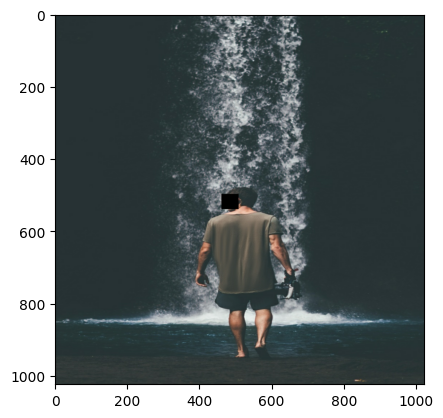

time: 611 ms (started: 2024-06-15 04:29:50 +00:00)


In [6]:
sample_image = tf.io.read_file(str(PATH / 'train/re/image_0.jpg'))
sample_image = tf.io.decode_jpeg(sample_image)
print(sample_image.shape)
plt.figure()
plt.imshow(sample_image)

In [7]:
def load(image_file):
    print(image_file)
    parts = tf.strings.split(image_file, '/')
    
    parent = parts[:-2]
    subdirectory = parts[-2]  
    filename = parts[-1]

    # Convert tensors to list for joining paths
    parent_parts = tf.unstack(parent)
    
    # Construct input and raw image paths
    input_path_parts = parent_parts + [subdirectory, 're', filename]
    raw_path_parts = parent_parts + [subdirectory, 'raw', filename]

    input_path = tf.strings.join(input_path_parts, separator='/')
    raw_path = tf.strings.join(raw_path_parts, separator='/')
    
    print(input_path)

    # Get scalar string values from tensors
    input_path = input_path.numpy().decode('utf-8')
    raw_path = raw_path.numpy().decode('utf-8')

    # Read and decode images
    input_image = tf.io.read_file(input_path)
    input_image = tf.image.decode_jpeg(input_image, channels=3)
    raw_image = tf.io.read_file(raw_path)
    raw_image = tf.image.decode_jpeg(raw_image, channels=3)

    # Cast images to float32
    input_image = tf.cast(input_image, tf.float32)
    raw_image = tf.cast(raw_image, tf.float32)

    return input_image, raw_image

# Example usage
image_file = str(PATH / 'train/image_0.jpg')
inp, re = load(image_file)

/notebooks/retouch_to_raw/dataset/train/image_0.jpg
tf.Tensor(b'/notebooks/retouch_to_raw/dataset/train/re/image_0.jpg', shape=(), dtype=string)
time: 139 ms (started: 2024-06-15 04:29:50 +00:00)


/notebooks/retouch_to_raw/dataset/train/image_0.jpg
tf.Tensor(b'/notebooks/retouch_to_raw/dataset/train/re/image_0.jpg', shape=(), dtype=string)


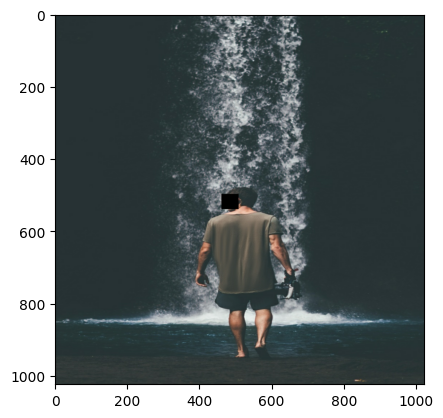

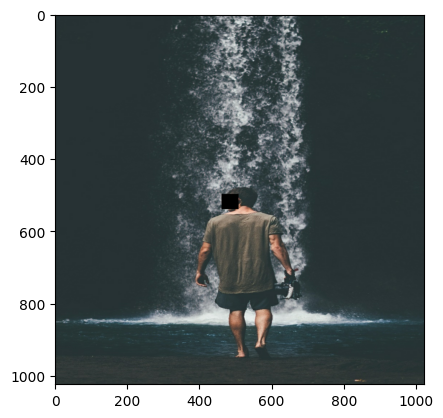

time: 705 ms (started: 2024-06-15 04:29:50 +00:00)


In [8]:
image_file = str(PATH / 'train/image_0.jpg')
inp, re = load(image_file)
plt.figure()
plt.imshow(inp / 255.0)
plt.figure()
plt.imshow(re / 255.0)

In [9]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 1024
IMG_HEIGHT = 1024
OUTPUT_CHANNELS = 3

time: 315 µs (started: 2024-06-15 04:29:51 +00:00)


In [10]:
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image


def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]


# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # Resizing to 286x286
    input_image, real_image = resize(input_image, real_image, 1152, 1152)

    # Random cropping back to 256x256
    input_image, real_image = random_crop(input_image, real_image)

    if tf.random.uniform(()) > 0.5:
        # Random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image

time: 1.13 ms (started: 2024-06-15 04:29:51 +00:00)


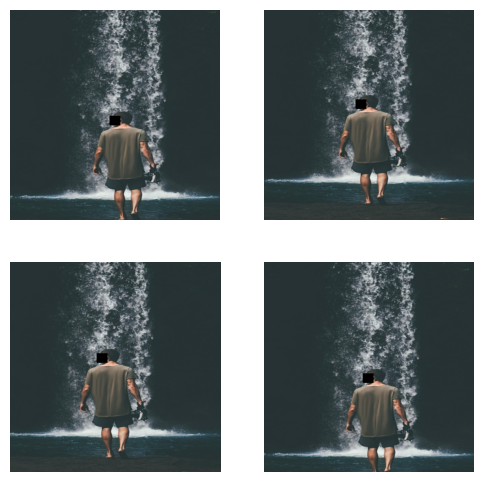

time: 810 ms (started: 2024-06-15 04:29:52 +00:00)


In [11]:
plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i + 1)
    plt.imshow(rj_inp / 255.0)
    plt.axis("off")
plt.show()

In [12]:
PATH = pathlib.Path('/notebooks/retouch_to_raw/dataset')

def load(input_image, output_image):
    input_image = tf.io.read_file(input_image)
    input_image = tf.image.decode_jpeg(input_image, channels=3)
    output_image = tf.io.read_file(output_image)
    output_image = tf.image.decode_jpeg(output_image, channels=3)
    input_image = tf.cast(input_image, tf.float32)
    output_image = tf.cast(output_image, tf.float32)

    return input_image, output_image

def load_image_train(input_image, output_image):
    input_image, real_image = load(input_image, output_image)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image

def load_image_test(input_image, output_image):
    input_image, real_image = load(input_image, output_image)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image


input_train = tf.data.Dataset.list_files(str(PATH / 'train/re/*.jpg'), shuffle=False)
output_train = tf.data.Dataset.list_files(str(PATH / 'train/raw/*.jpg'), shuffle=False)
train_dataset = tf.data.Dataset.zip((input_train, output_train))

def load_and_preprocess_train(input_path, output_path):
    input_image, output_image = tf.py_function(load_image_train, [input_path, output_path], [tf.float32, tf.float32])
    return input_image, output_image

train_dataset = train_dataset.map(load_and_preprocess_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

time: 194 ms (started: 2024-06-15 04:29:53 +00:00)


In [13]:
input_test = tf.data.Dataset.list_files(str(PATH / 'test/re/*.jpg'), shuffle=False)
output_test = tf.data.Dataset.list_files(str(PATH / 'test/raw/*.jpg'), shuffle=False)
test_dataset = tf.data.Dataset.zip((input_test, output_test))

def load_and_preprocess_test(input_path, output_path):
    input_image, output_image = tf.py_function(load_image_test, [input_path, output_path], [tf.float32, tf.float32])
    return input_image, output_image

test_dataset = test_dataset.map(load_and_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

time: 53.2 ms (started: 2024-06-15 04:29:53 +00:00)


In [14]:
input_val = tf.data.Dataset.list_files(str(PATH / 'val/re/*.jpg'), shuffle=False)
output_val = tf.data.Dataset.list_files(str(PATH / 'val/raw/*.jpg'), shuffle=False)
val_dataset = tf.data.Dataset.zip((input_val, output_val))
def load_and_preprocess_val(input_path, output_path):
    input_image, output_image = tf.py_function(load_image_test, [input_path, output_path], [tf.float32, tf.float32])
    return input_image, output_image

val_dataset = val_dataset.map(load_and_preprocess_test, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(BUFFER_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

time: 31.2 ms (started: 2024-06-15 04:29:54 +00:00)


In [15]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0.0, 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(
            filters,
            size,
            strides=2,
            padding="same",
            kernel_initializer=initializer,
            use_bias=False,
        )
    )

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())
    result.add(tf.keras.layers.LeakyReLU())
    return result


down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print(down_result.shape)

2024-06-15 04:29:57.376287: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906


(1, 512, 512, 3)
time: 605 ms (started: 2024-06-15 04:29:57 +00:00)


In [16]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0.0, 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(
            filters,
            size,
            strides=2,
            padding="same",
            kernel_initializer=initializer,
            use_bias=False,
        )
    )

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 1024, 1024, 3)
time: 493 ms (started: 2024-06-15 04:29:59 +00:00)


In [17]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[1024, 1024, 3])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),  # (batch_size, 512, 512, 32)
        downsample(64, 4),  # (batch_size, 512, 512, 64)
        downsample(128, 4),  # (batch_size, 256, 256, 128)
        downsample(256, 4),  # (batch_size, 128, 128, 256)
        downsample(512, 4),  # (batch_size, 64, 64, 512)
        downsample(1024, 4),  # (batch_size, 32, 32, 1024)
        downsample(1024, 4),  # (batch_size, 16, 16, 1024)
        downsample(1024, 4),  # (batch_size, 8, 8, 1024)
        downsample(2048, 4),  # (batch_size, 4, 4, 1024)
        downsample(2048, 4),  # (batch_size, 2, 2, 1024)
    ]

    up_stack = [
        upsample(2048, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
        upsample(2048, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
        upsample(1024, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
        upsample(1024, 4, apply_dropout=True),  # (batch_size, 16, 16, 1024)
        upsample(512, 4),  # (batch_size, 32, 32, 1024)
        upsample(256, 4),  # (batch_size, 64, 64, 512)
        upsample(128, 4),  # (batch_size, 128, 128, 256)
        upsample(64, 4),  # (batch_size, 256, 256, 128)
        upsample(64, 4),  # (batch_size, 256, 256, 128)
    ]

    initializer = tf.random_normal_initializer(0.0, 0.02)
    last = tf.keras.layers.Conv2DTranspose(
        OUTPUT_CHANNELS,
        4,
        strides=2,
        padding="same",
        kernel_initializer=initializer,
        activation="tanh",
    )  # (batch_size, 1024, 1024, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

time: 1.08 ms (started: 2024-06-15 04:30:05 +00:00)


In [18]:
# !apt-get install graphviz -y
# !pip install pydot

time: 218 µs (started: 2024-06-15 04:30:05 +00:00)


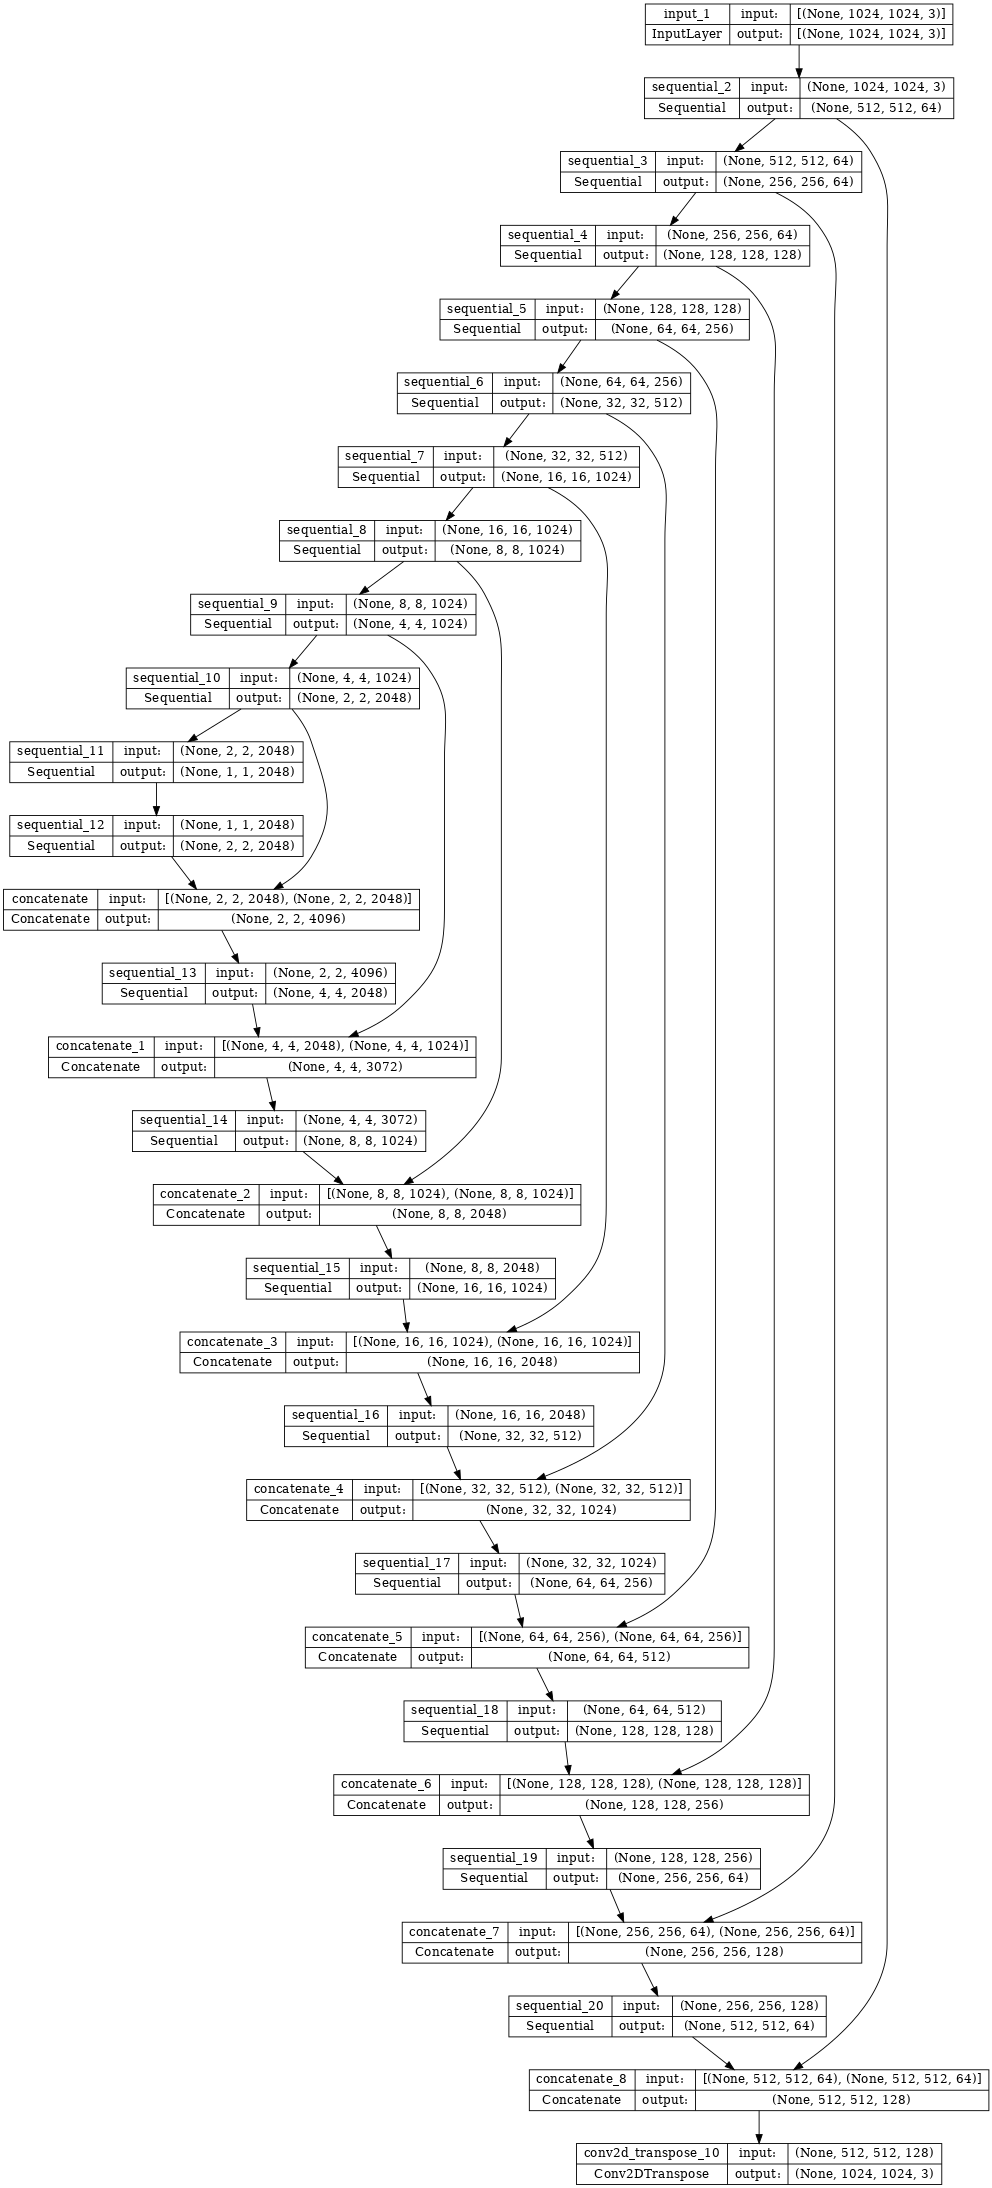

time: 766 ms (started: 2024-06-15 04:30:06 +00:00)


In [19]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


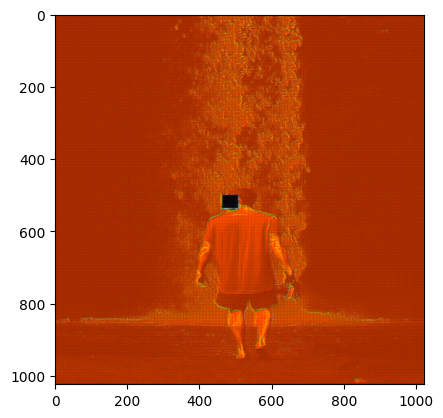

time: 4.08 s (started: 2024-06-15 04:30:40 +00:00)


In [20]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [21]:
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # Mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

time: 684 µs (started: 2024-06-15 04:30:44 +00:00)


In [22]:
def Discriminator():
    initializer = tf.random_normal_initializer(0.0, 0.02)

    inp = tf.keras.layers.Input(shape=[1024, 1024, 3], name="input_image")
    tar = tf.keras.layers.Input(shape=[1024, 1024, 3], name="target_image")

    x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 1024, 1024, channels*2)

    down1 = downsample(64, 4, False)(x)  # (batch_size, 512, 512, 64)
    down2 = downsample(128, 4)(down1)    # (batch_size, 256, 256, 128)
    down3 = downsample(256, 4)(down2)    # (batch_size, 128, 128, 256)
    down4 = downsample(512, 4)(down3)    # (batch_size, 64, 64, 512)
    down5 = downsample(1024, 4)(down4)   # (batch_size, 32, 32, 1024)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down5)  # (batch_size, 18, 18, 2048)
    conv = tf.keras.layers.Conv2D(
        2048, 4, strides=1, kernel_initializer=initializer, use_bias=False
    )(zero_pad1)  # (batch_size, 15, 15, 2048)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 17, 17, 2048)

    last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(
        zero_pad2
    )  # (batch_size, 14, 14, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

time: 1.06 ms (started: 2024-06-15 04:30:44 +00:00)


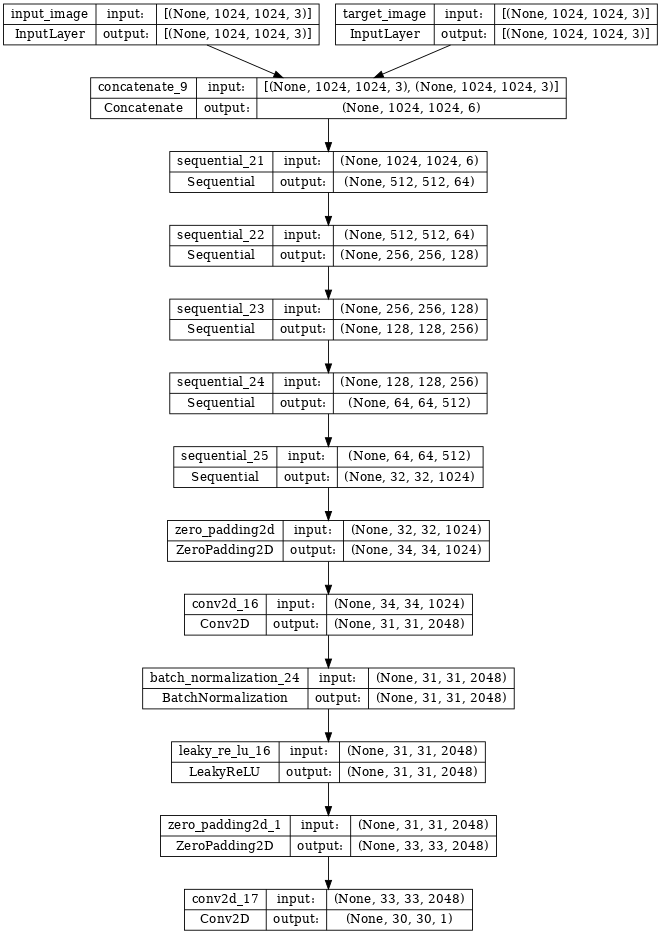

time: 217 ms (started: 2024-06-15 04:30:44 +00:00)


In [23]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

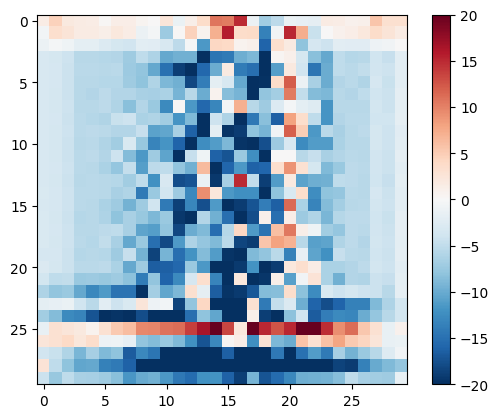

time: 1.32 s (started: 2024-06-15 04:30:45 +00:00)


In [24]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [25]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(
        tf.zeros_like(disc_generated_output), disc_generated_output
    )

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss


time: 591 µs (started: 2024-06-15 04:31:09 +00:00)


In [26]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

time: 12 ms (started: 2024-06-15 04:31:13 +00:00)


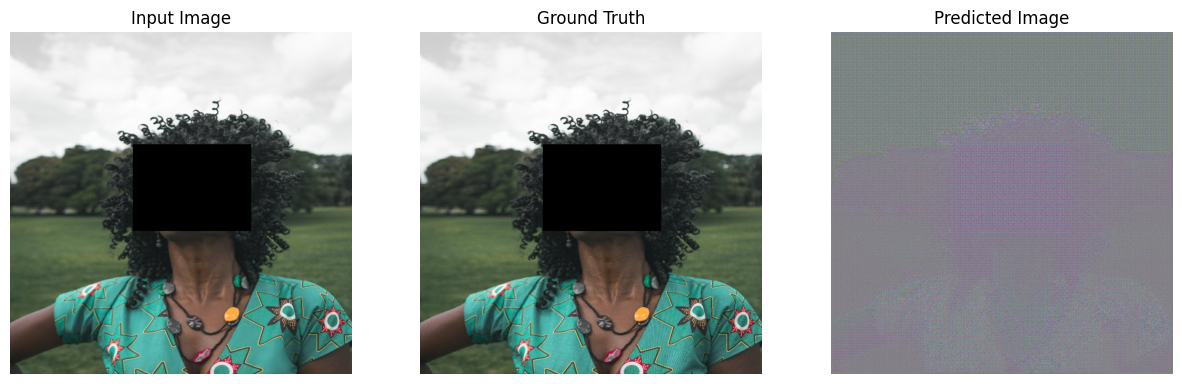

time: 3.35 s (started: 2024-06-15 04:31:15 +00:00)


In [27]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ["Input Image", "Ground Truth", "Predicted Image"]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis("off")
    plt.show()


for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [28]:
import datetime, time
from IPython import display

log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

time: 5.73 ms (started: 2024-06-15 04:31:18 +00:00)


In [29]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(
            disc_generated_output, gen_output, target
        )
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(
        gen_total_loss, generator.trainable_variables
    )
    discriminator_gradients = disc_tape.gradient(
        disc_loss, discriminator.trainable_variables
    )

    generator_optimizer.apply_gradients(
        zip(generator_gradients, generator.trainable_variables)
    )
    discriminator_optimizer.apply_gradients(
        zip(discriminator_gradients, discriminator.trainable_variables)
    )

    with summary_writer.as_default():
        tf.summary.scalar("gen_total_loss", gen_total_loss, step=step // 1000)
        tf.summary.scalar("gen_gan_loss", gen_gan_loss, step=step // 1000)
        tf.summary.scalar("gen_l1_loss", gen_l1_loss, step=step // 1000)
        tf.summary.scalar("disc_loss", disc_loss, step=step // 1000)


time: 1.1 ms (started: 2024-06-15 04:31:18 +00:00)


In [30]:
def fit(train_ds, test_ds, steps):
    example_input, example_target = next(iter(test_ds.take(1)))
    start = time.time()

    for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
        if (step) % 1000 == 0:
            display.clear_output(wait=True)

            if step != 0:
                print(f"Time taken for 1000 steps: {time.time()-start:.2f} sec\n")

            start = time.time()

            generate_images(generator, example_input, example_target)
            print(f"Step: {step//1000}k")

        train_step(input_image, target, step)

        # Training step
        if (step + 1) % 10 == 0:
            print(".", end="", flush=True)

        # Save (checkpoint) the model every 5k steps
        if (step + 1) % 5000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)


time: 667 µs (started: 2024-06-15 04:31:21 +00:00)


In [33]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4605), started 0:03:12 ago. (Use '!kill 4605' to kill it.)

time: 4.97 ms (started: 2024-06-15 04:35:18 +00:00)


Time taken for 1000 steps: 296.03 sec



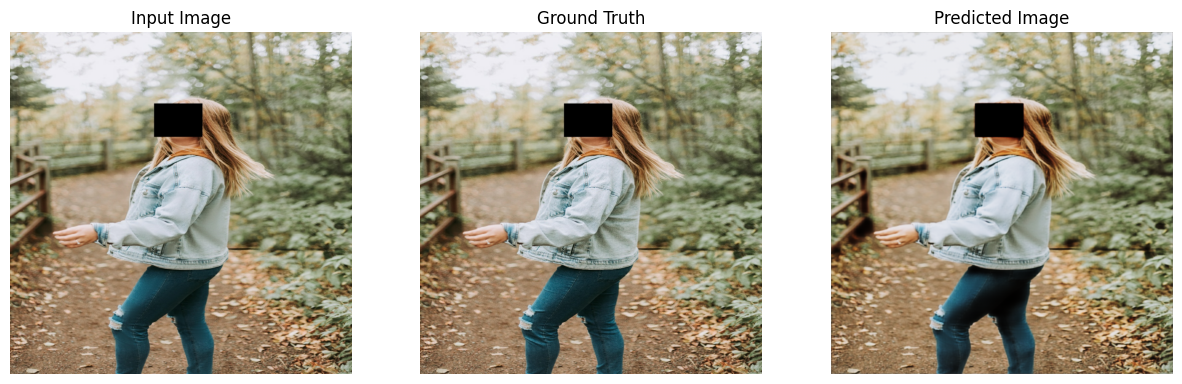

Step: 4k
..........................................................................................

In [ ]:
fit(train_dataset, test_dataset, steps=40000)

In [ ]:
!ls {checkpoint_dir}

In [ ]:
# Restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)